In [64]:
#Name-Neha somvanshi
#project_name- HR Analytics Project Analysis
#Batch number- DS2307

In [21]:
import scipy.stats as stats

import pandas as pd                              #dataframe dependency

import numpy as np                               #computation dependency

import matplotlib.pyplot as plt                 # visualization dependency
%matplotlib inline



import seaborn as sns                           # visualization dependency

from scipy import stats                         # stats dependency


from sklearn.preprocessing import StandardScaler  # applying standard scaling to the dataframe


from sklearn.model_selection import train_test_split   #train _test split

import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv("E:\IBM_HR_Attrition_Rate_Analytics-master\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#Features and Targets:

INPUT FEATURES:
'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

#TARGET FEATURE:
'Attrition'

In [8]:
df.drop(['Attrition'],axis=1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

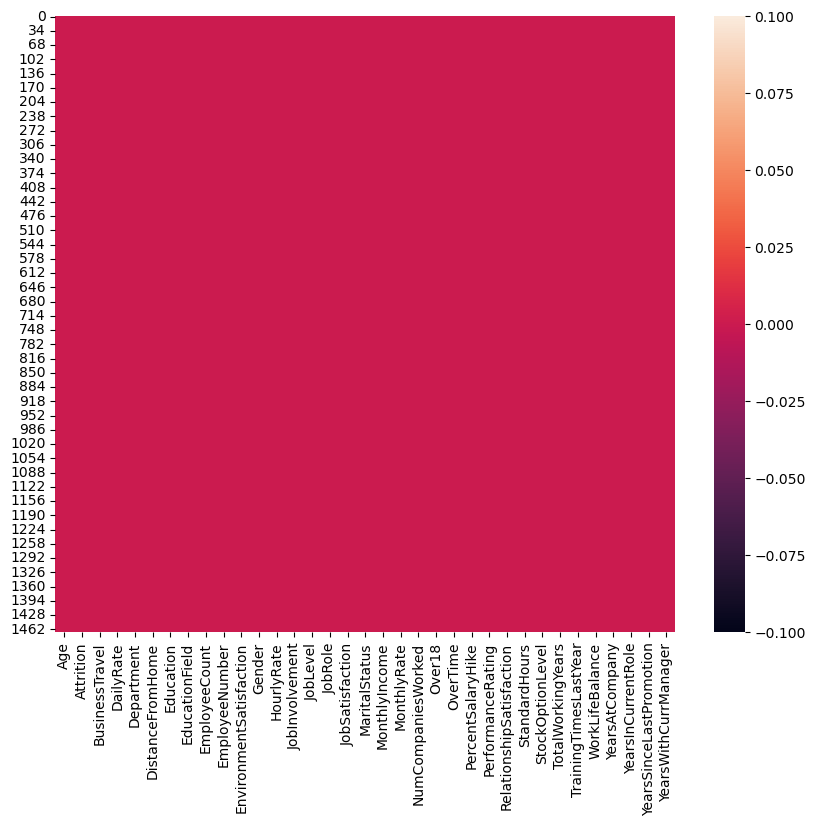

In [19]:
# heatmap to find missing data

plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
plt.show()

In [25]:
#seperate numerical columns and categorical columns.
categorial_features = df.select_dtypes(include=[object])  # extract categorical (object) type data types
categorial_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [28]:
numerical_feature=df.select_dtypes(include=[np.number])
numerical_feature.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


# converting categorical features into numerical form

In [30]:
#using labelencoding for columns with only two categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [31]:
# using dummies for columns with more than two categories
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 
                                               'JobRole', 'MaritalStatus'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   Gender                             1470 non-null   int32
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                           1470 non-null   int64
 12  JobSatisfaction     

# outlier detection

In [32]:
df_num=df[['Age', 'DailyRate','EmployeeCount',
       'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
df_num

,Age,DailyRate,EmployeeCount,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,1,8,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,1,2,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,1,2,3,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


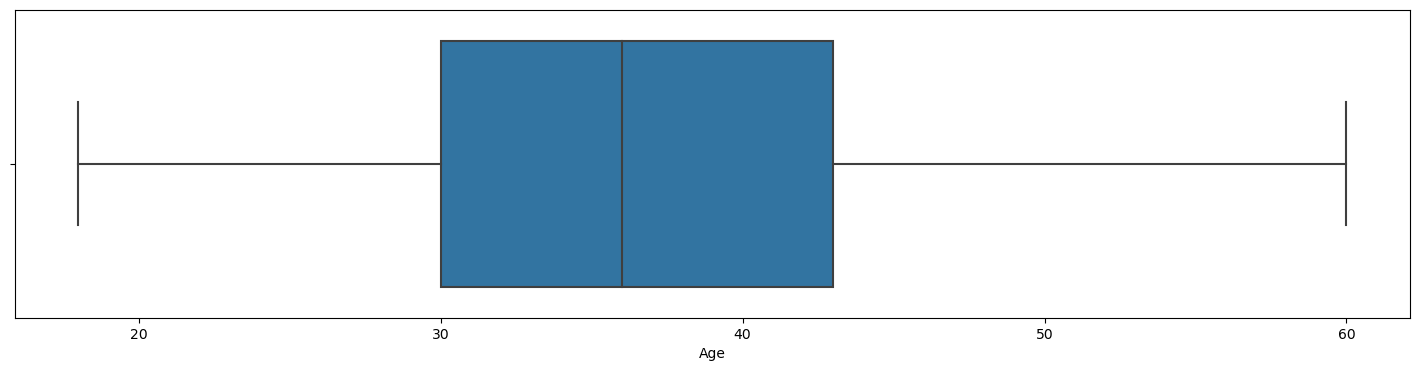

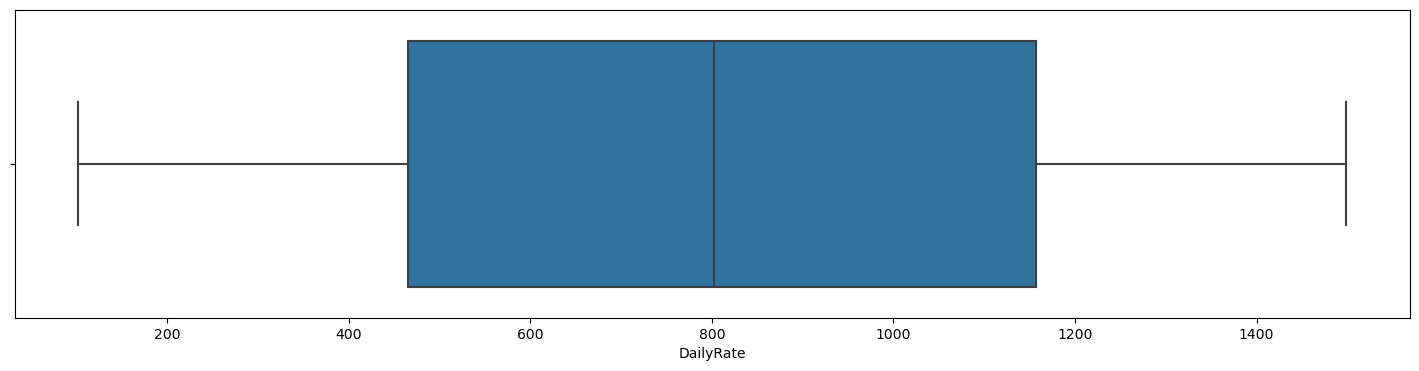

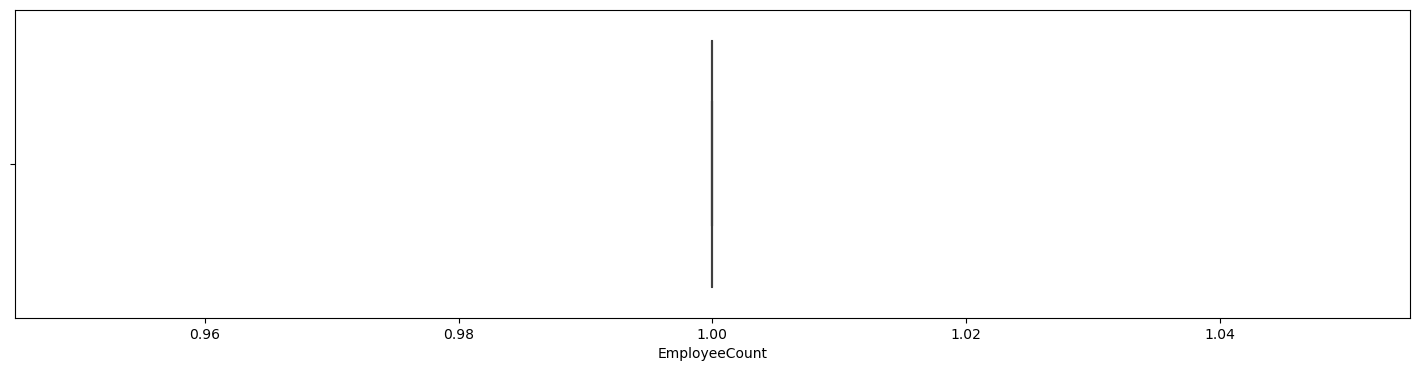

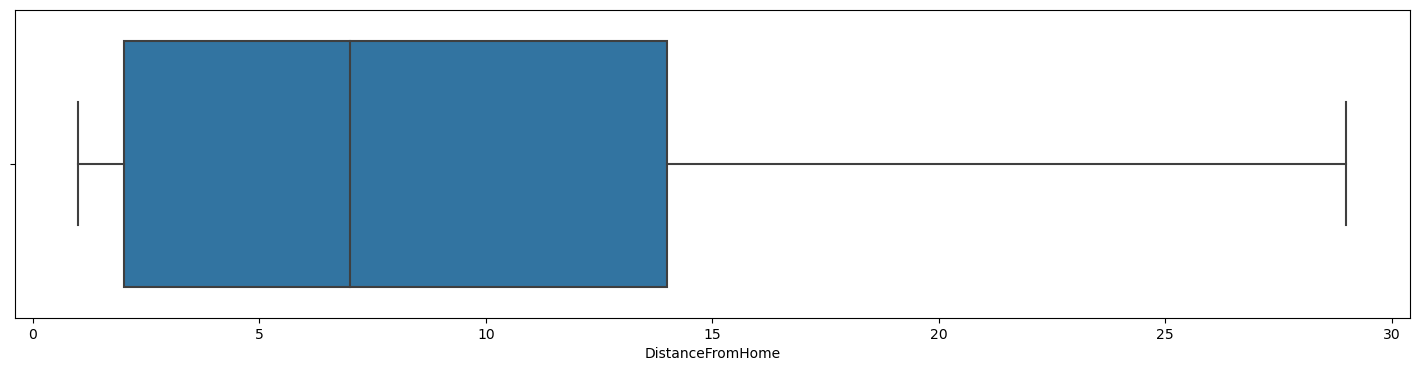

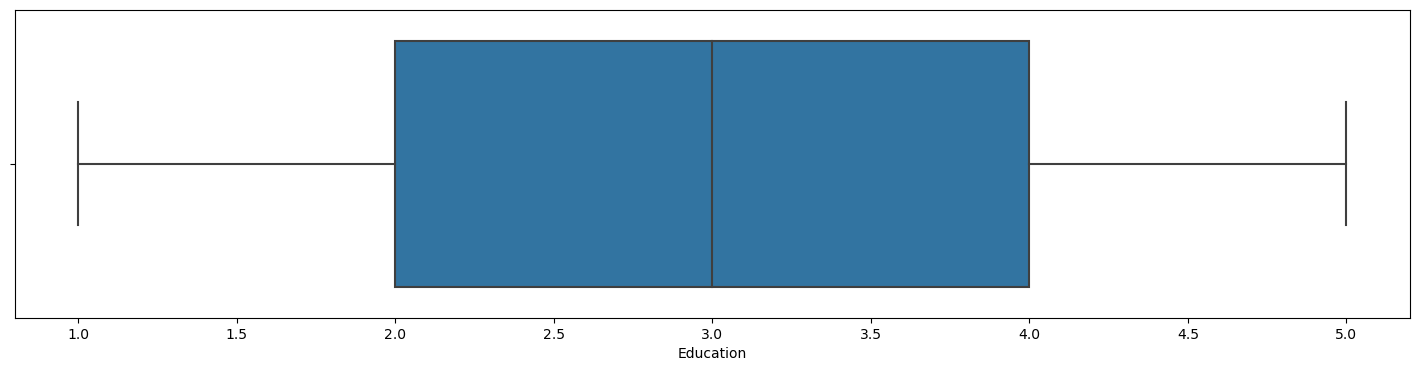

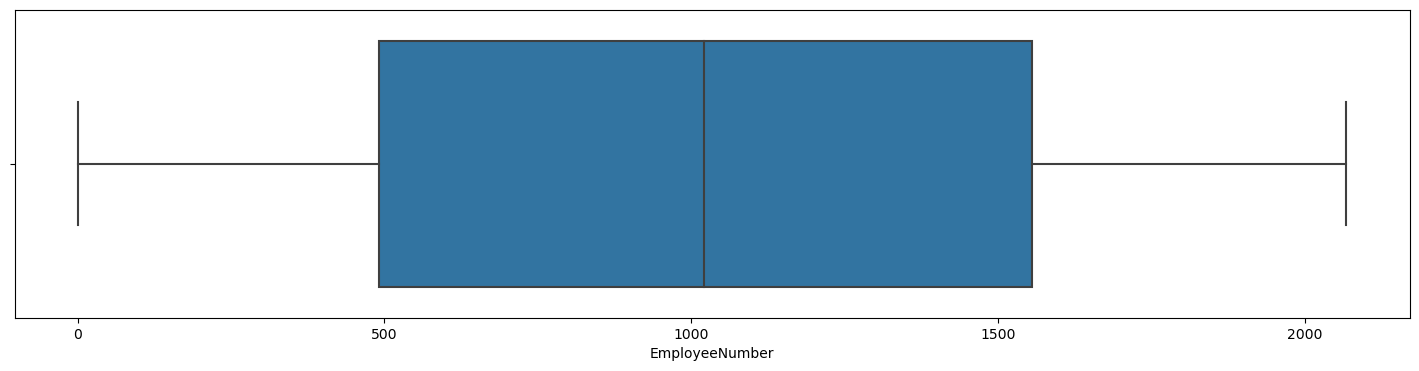

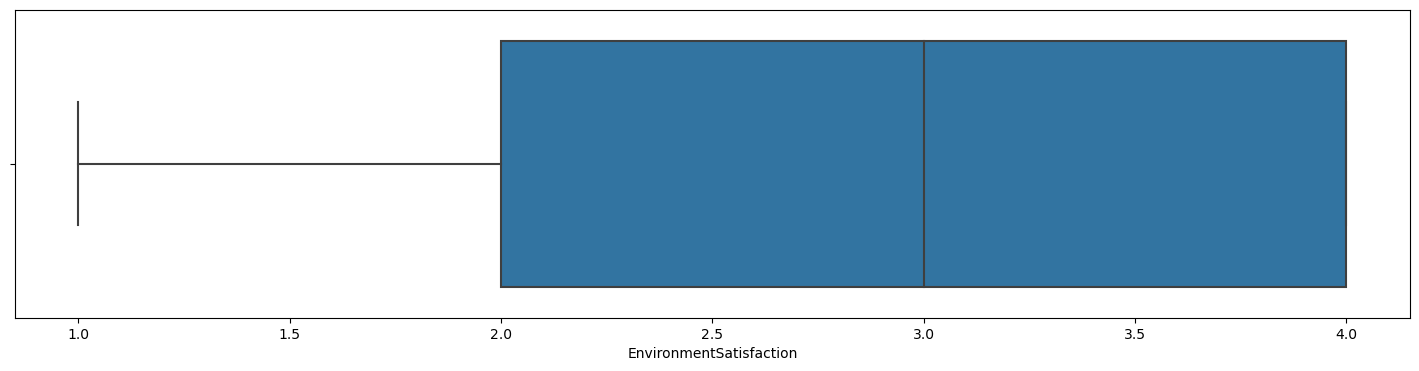

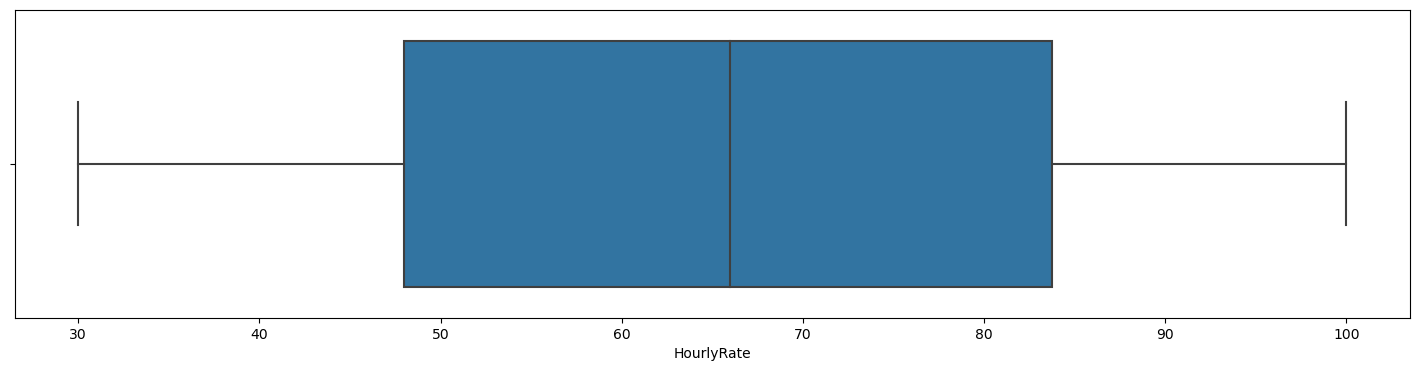

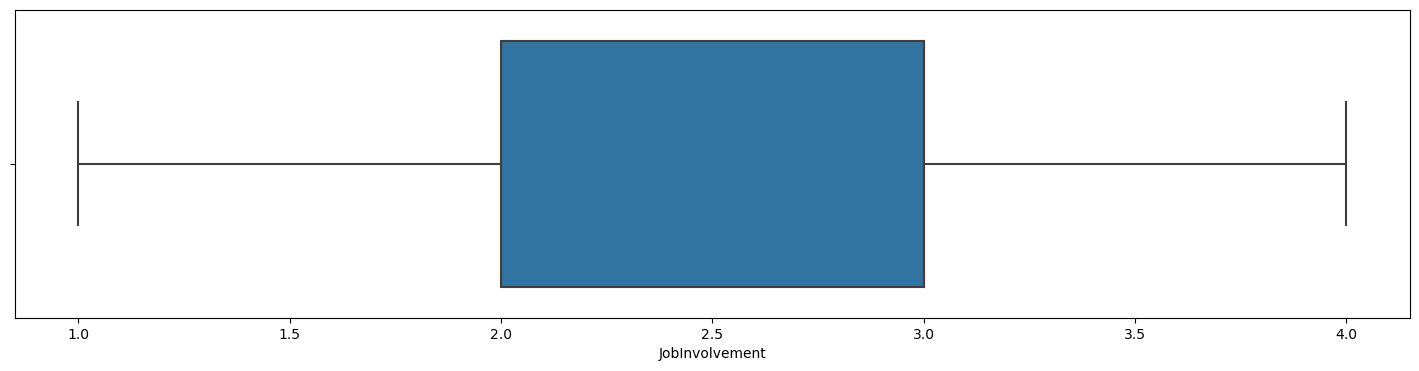

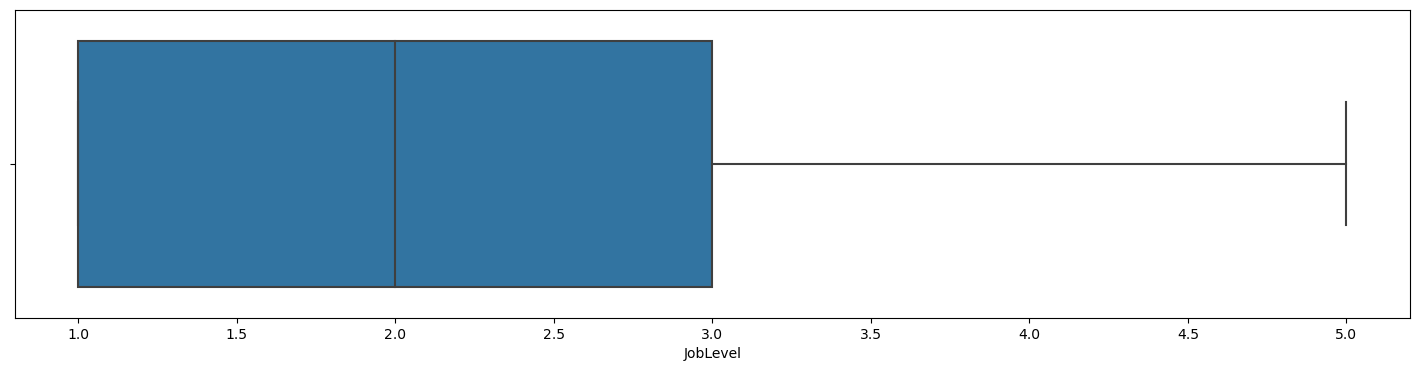

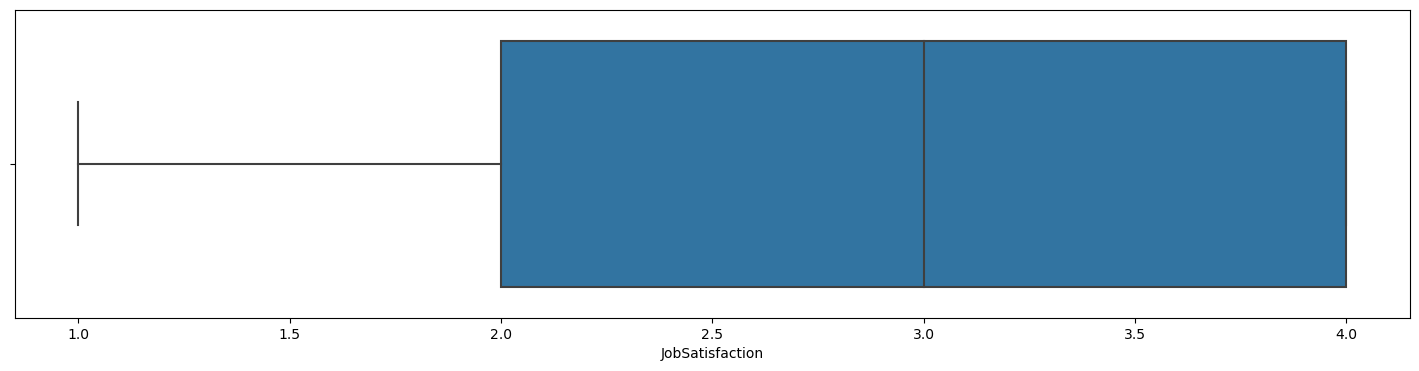

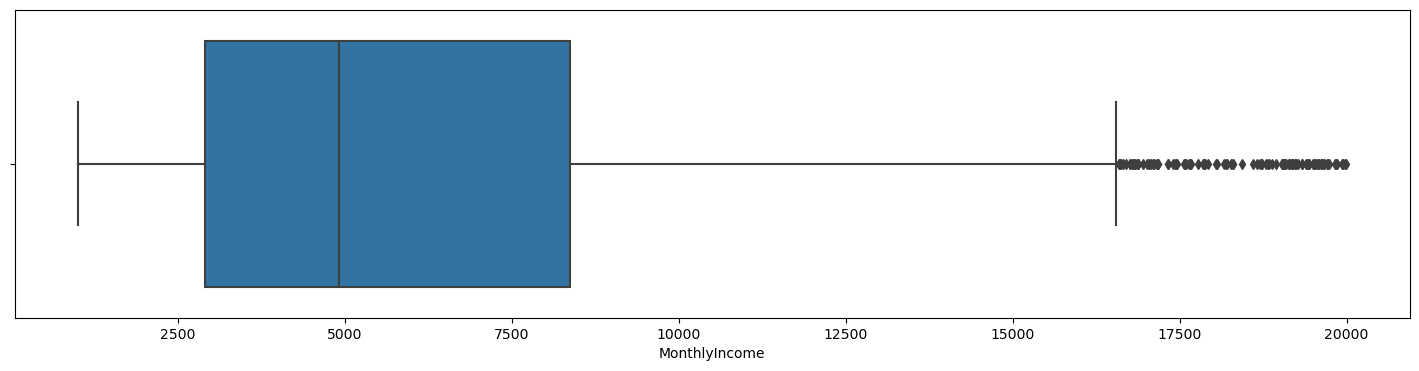

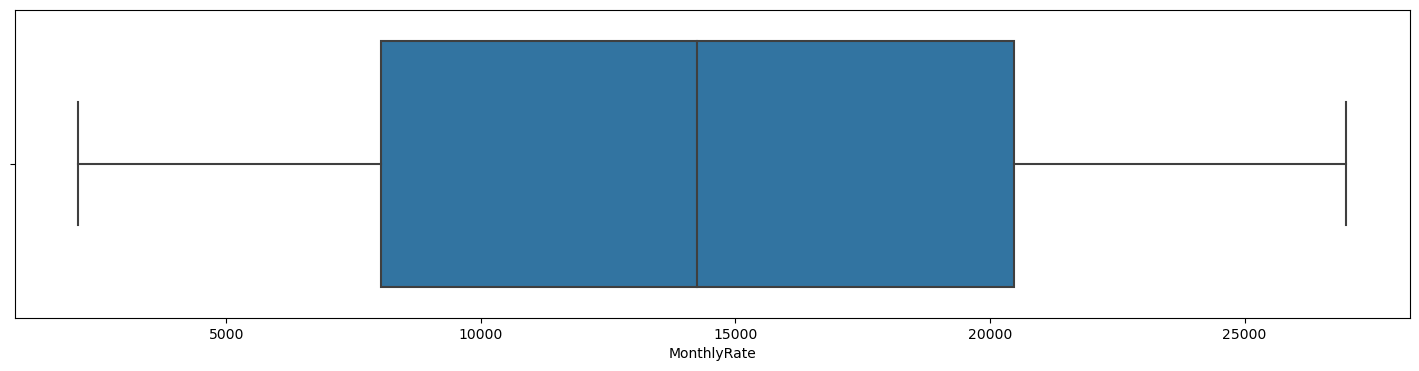

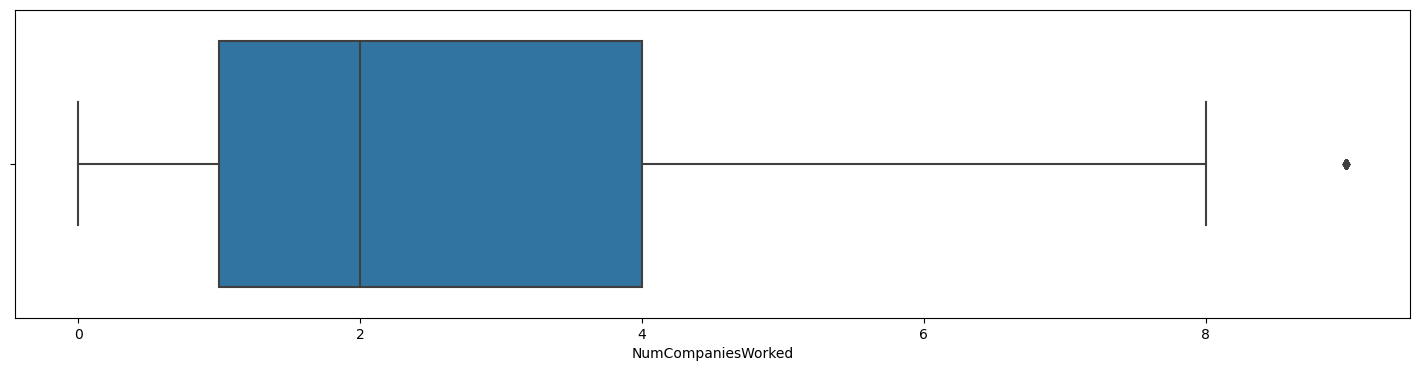

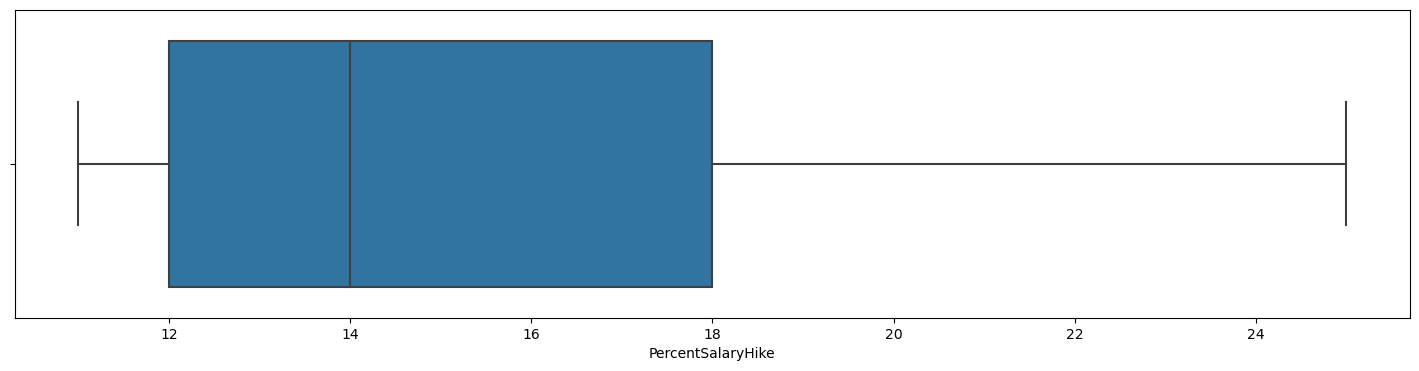

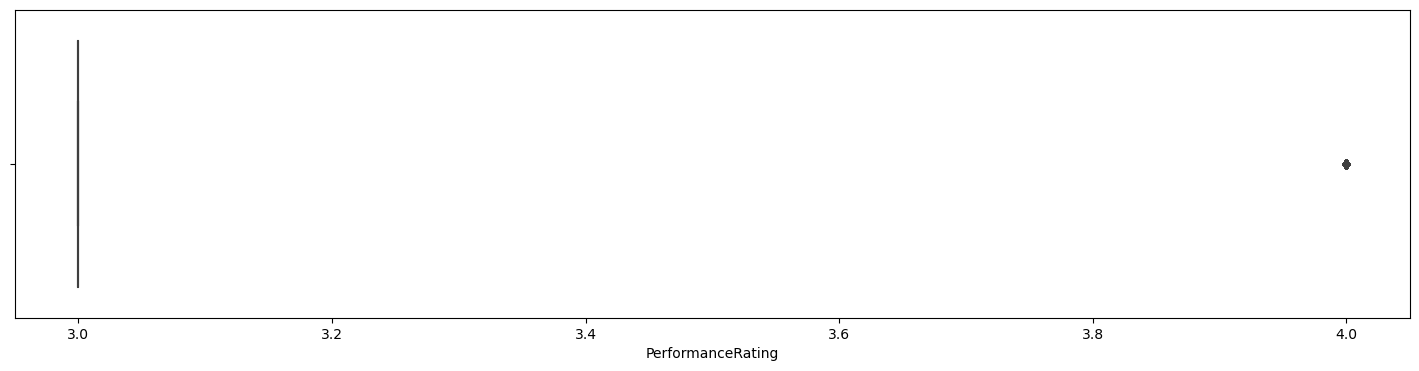

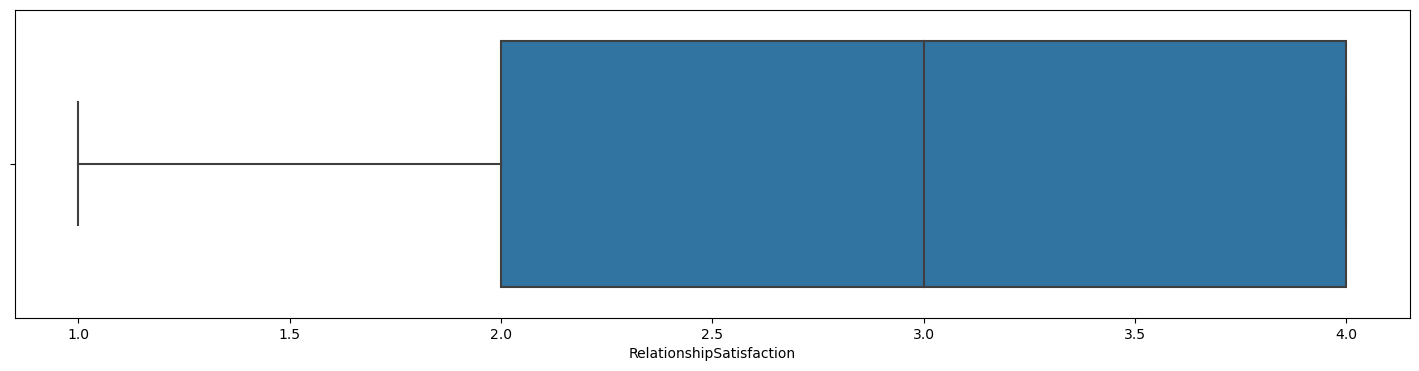

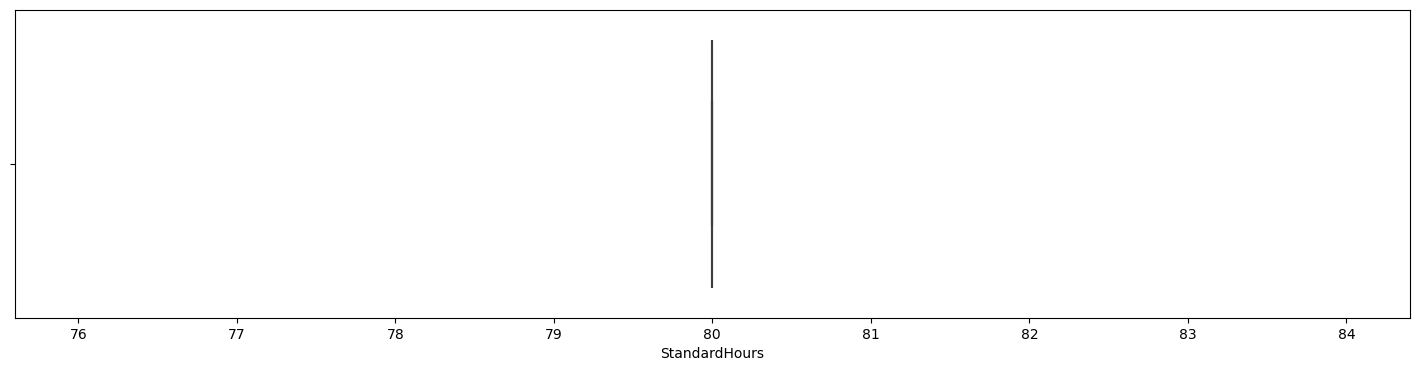

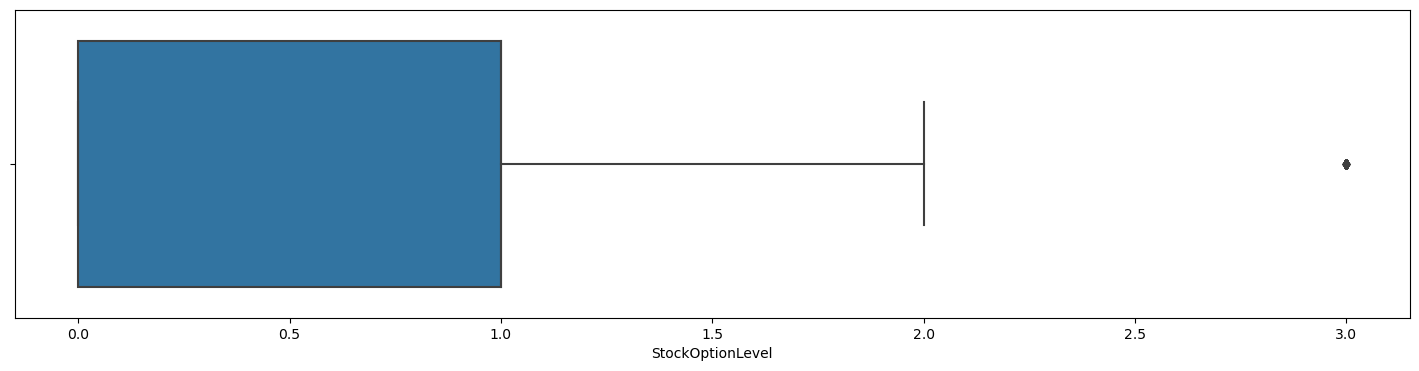

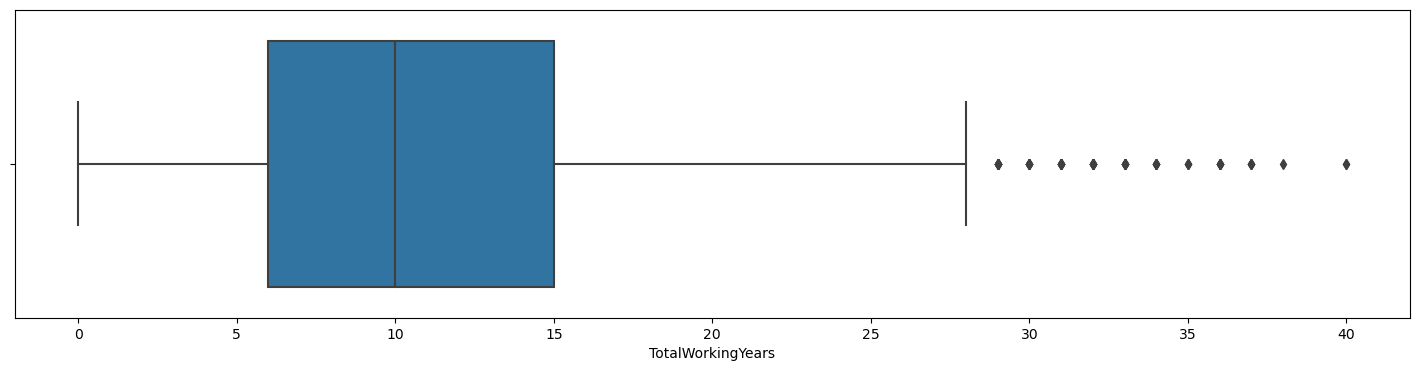

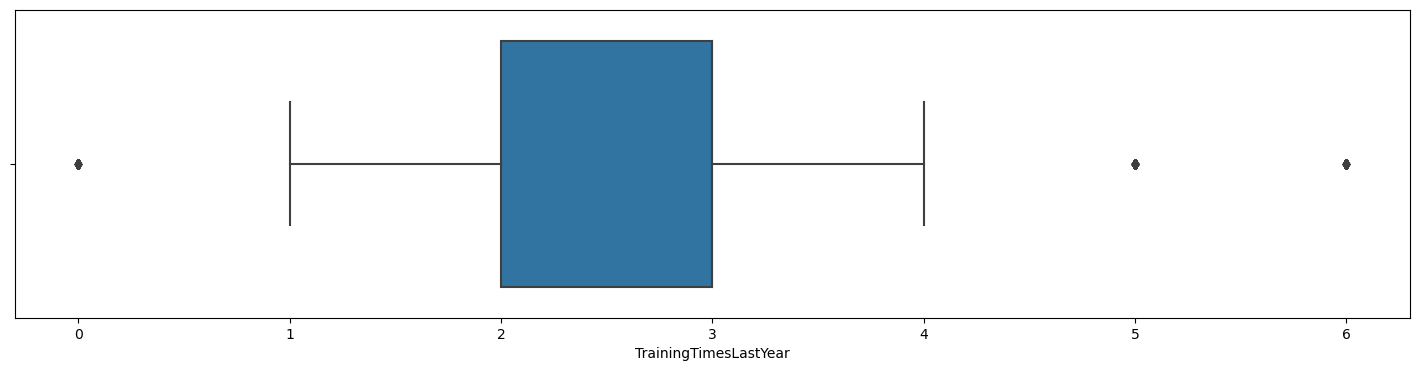

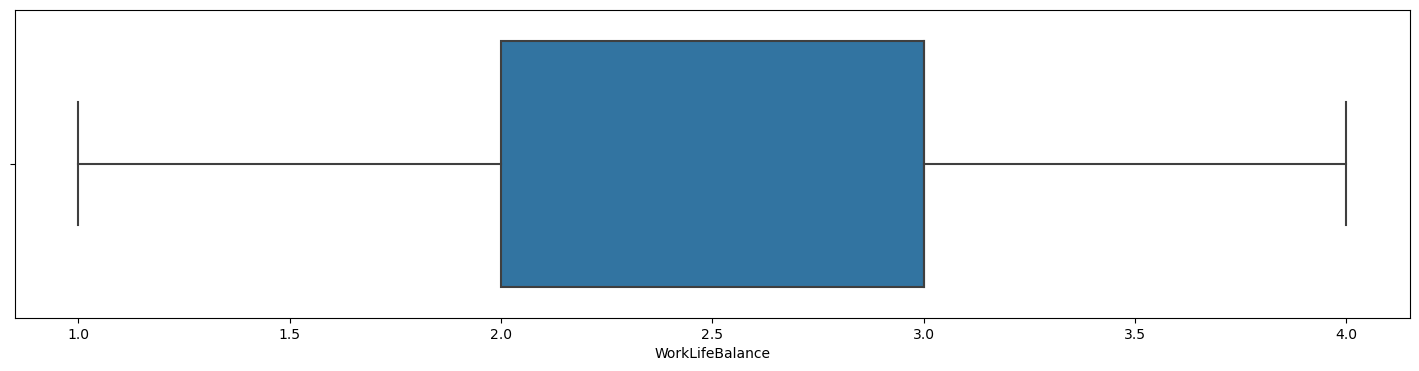

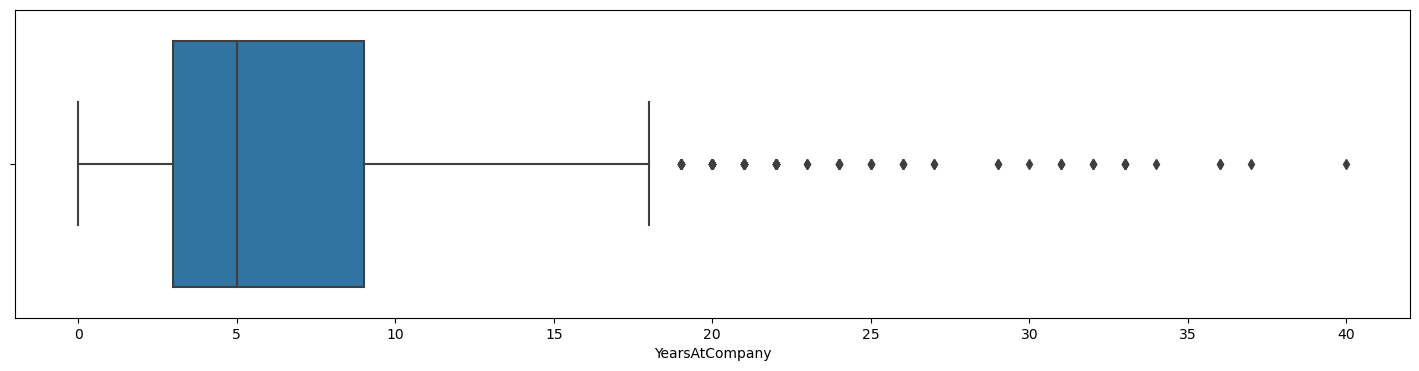

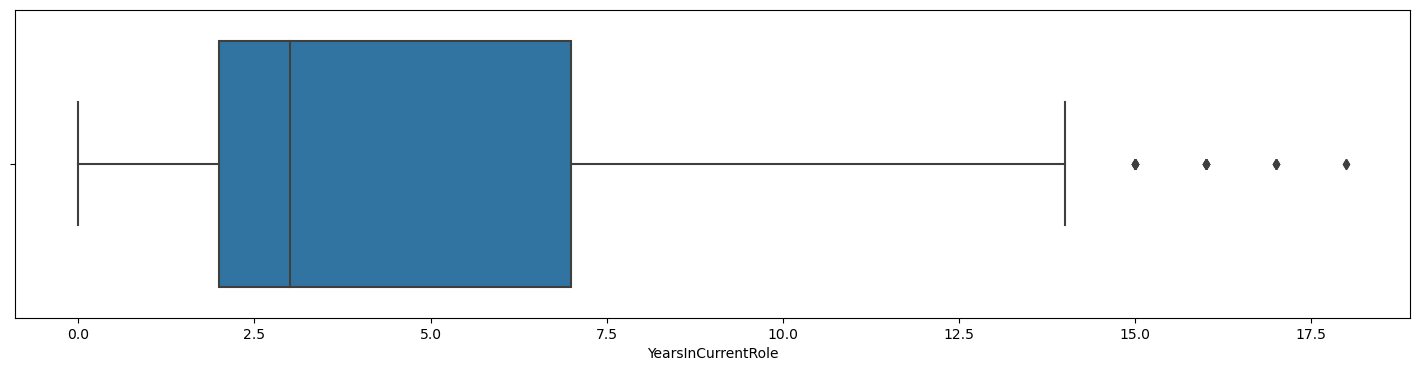

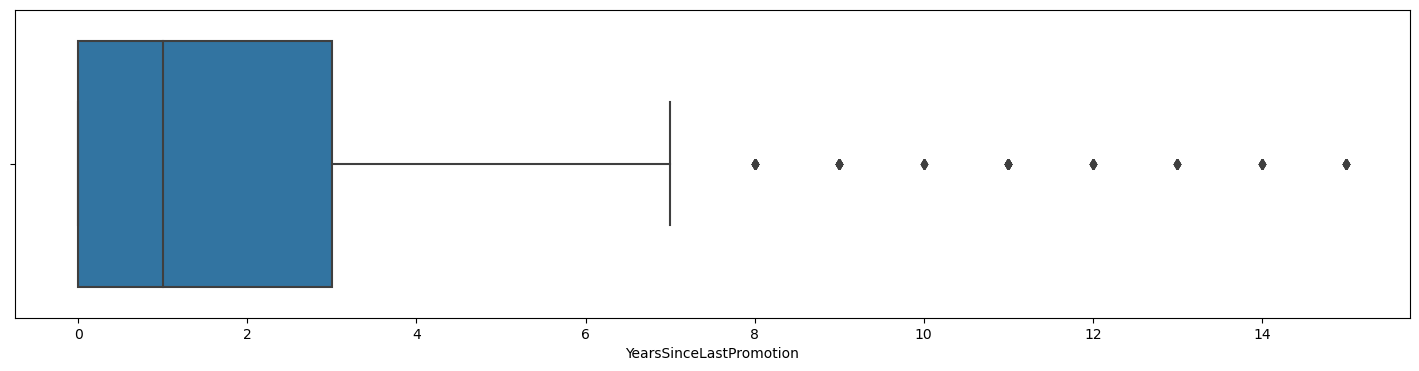

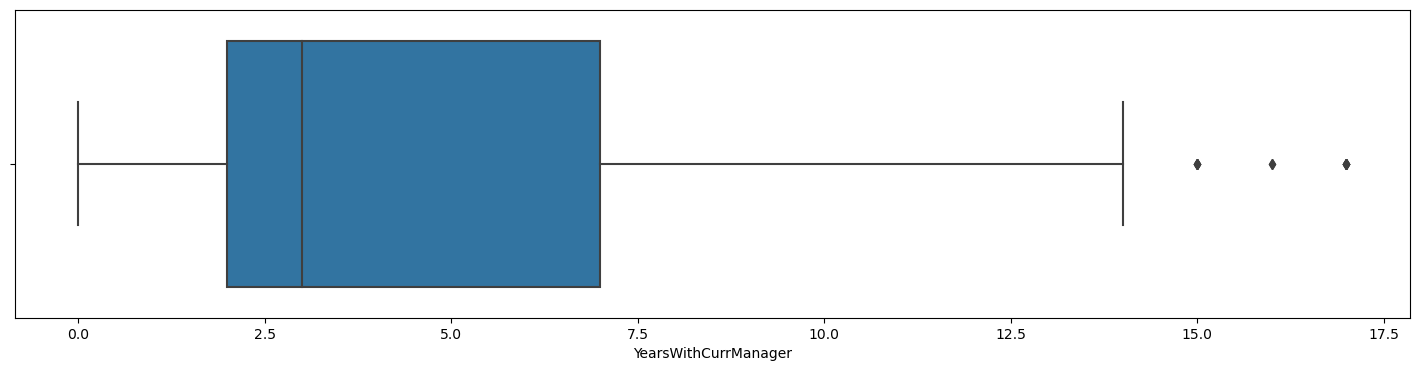

In [33]:
# plotting a box plt for each of the feature seperately:
for col in df_num:
    plt.figure(figsize=(18,4))
    sns.boxplot(df_num[col])
    plt.show()

In [34]:
# addressing outliers using the IOR:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

df_clean = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

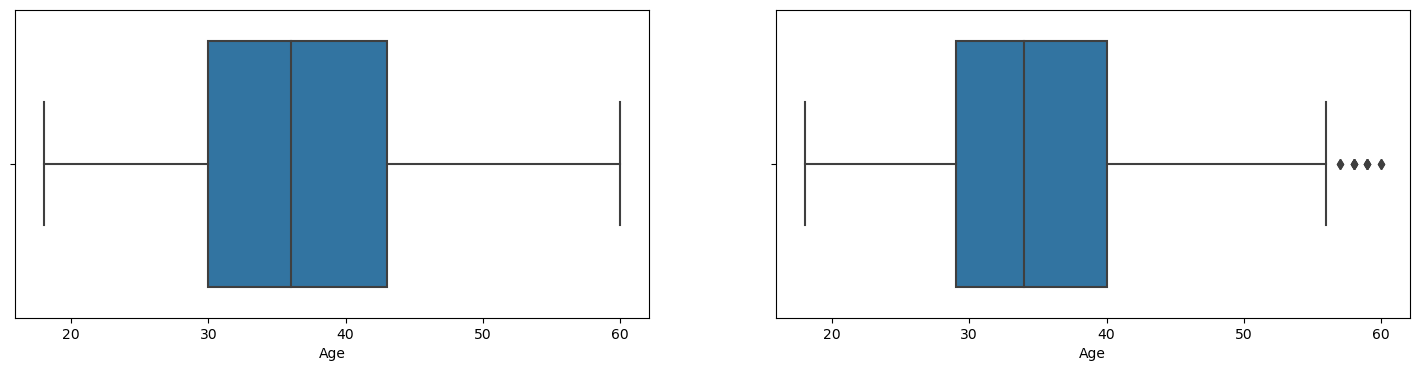

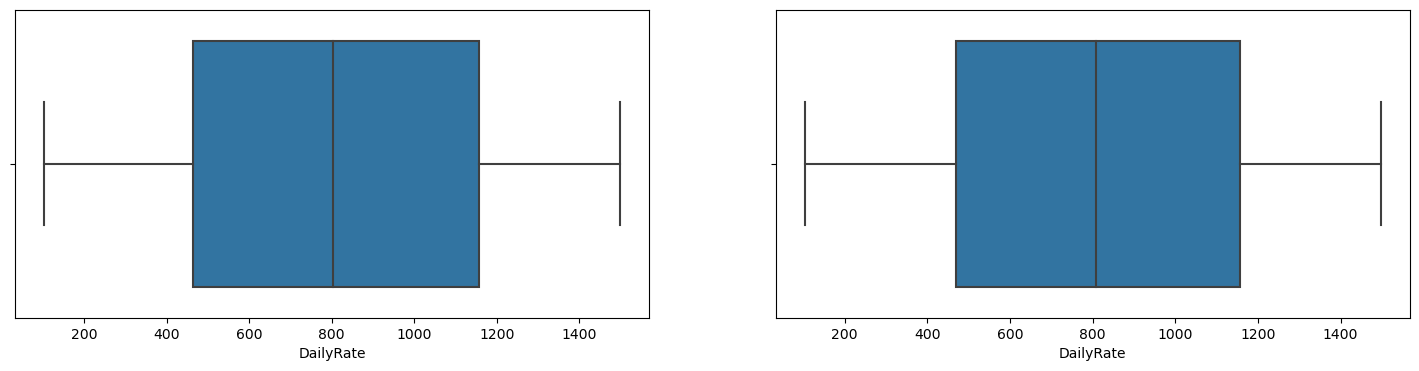

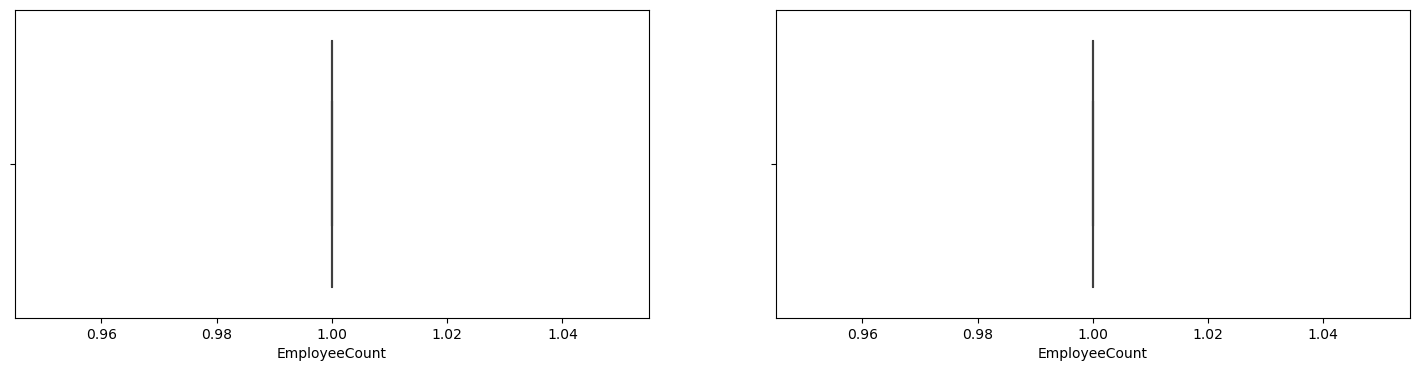

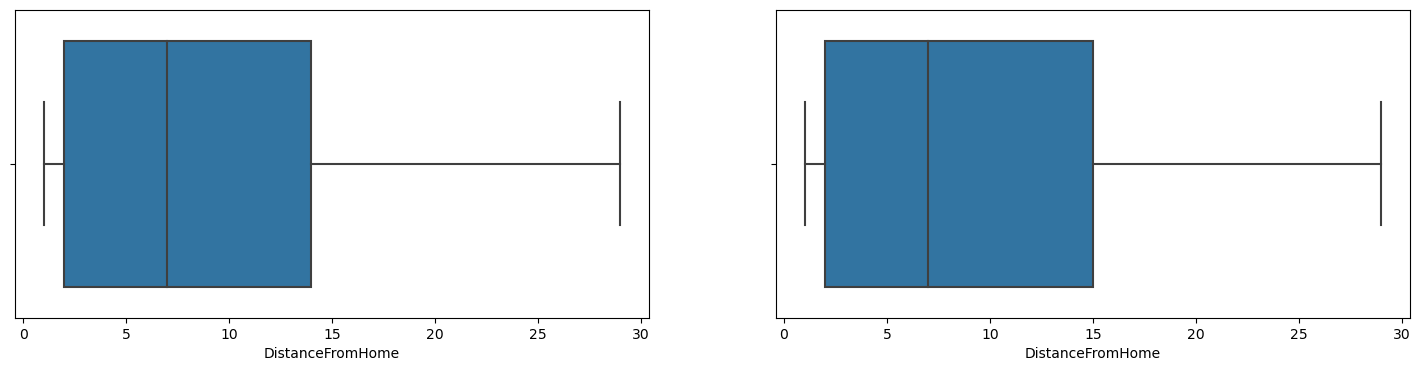

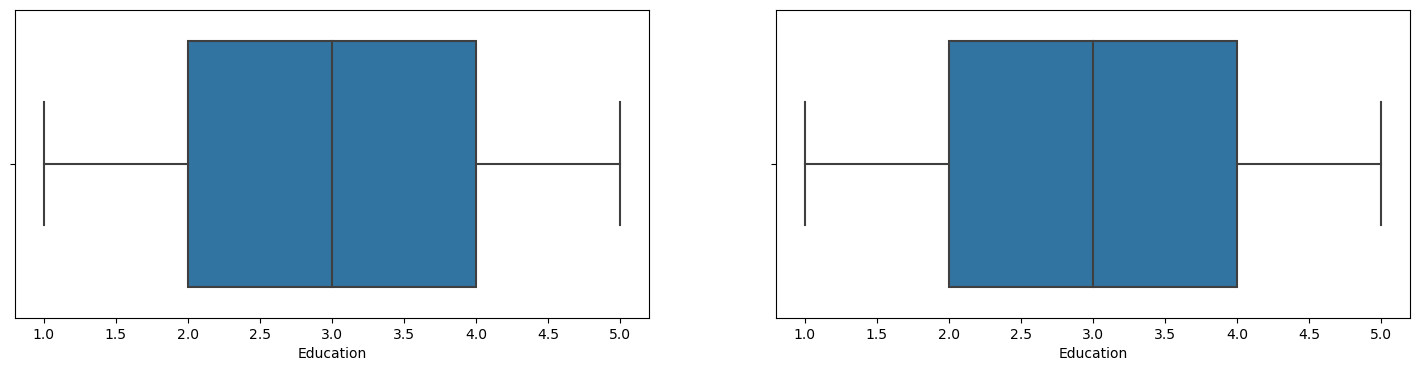

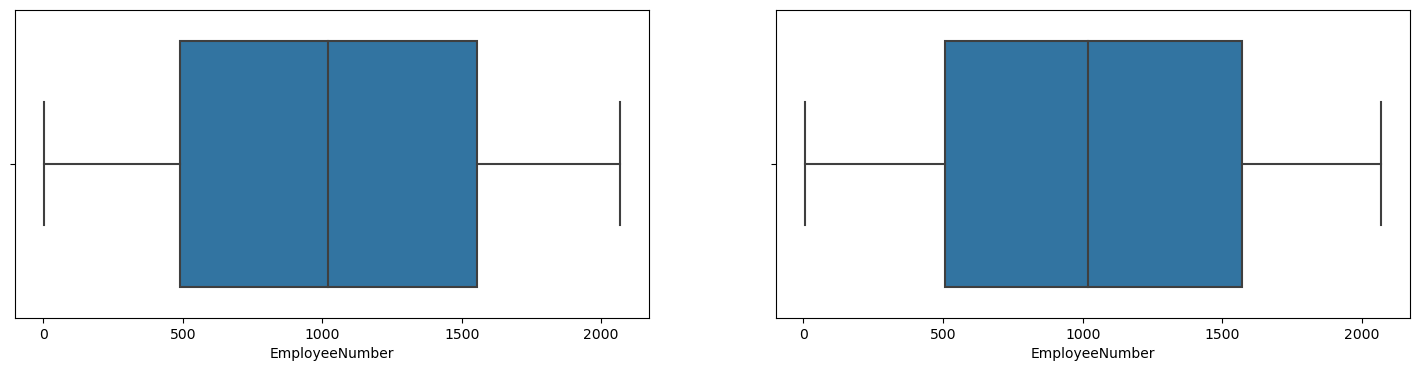

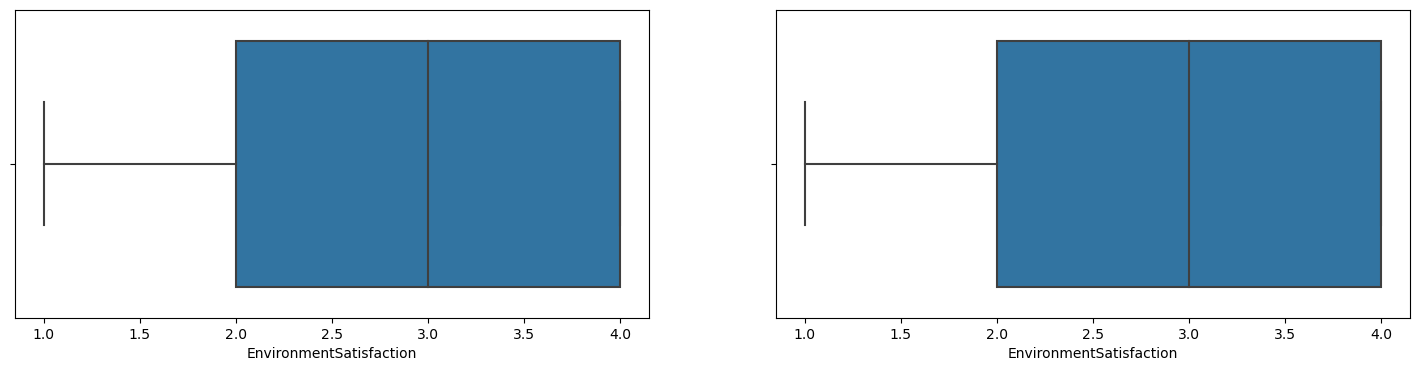

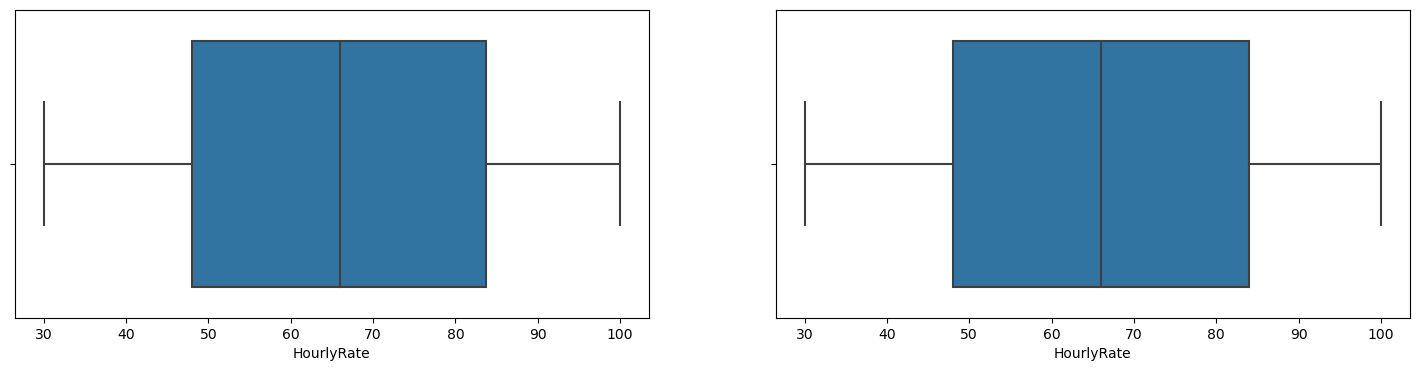

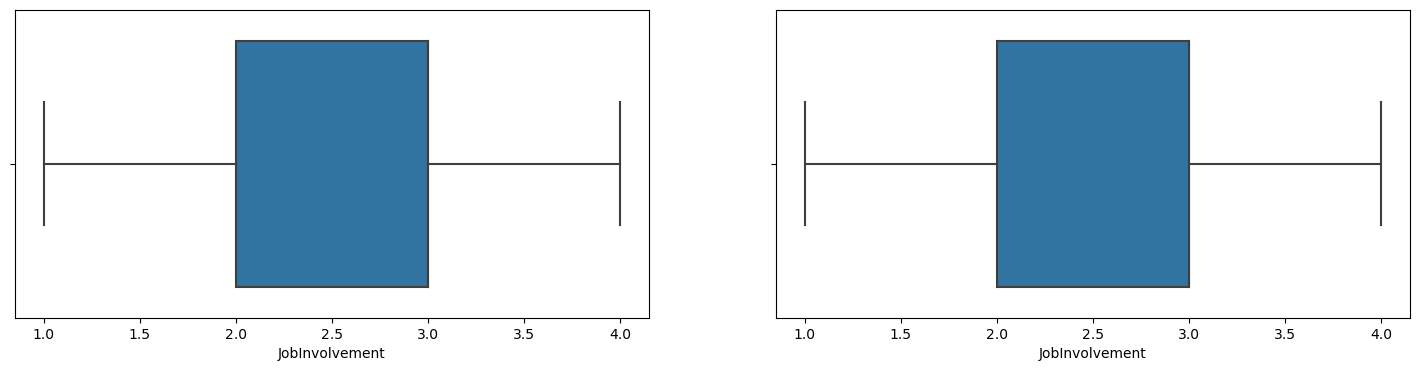

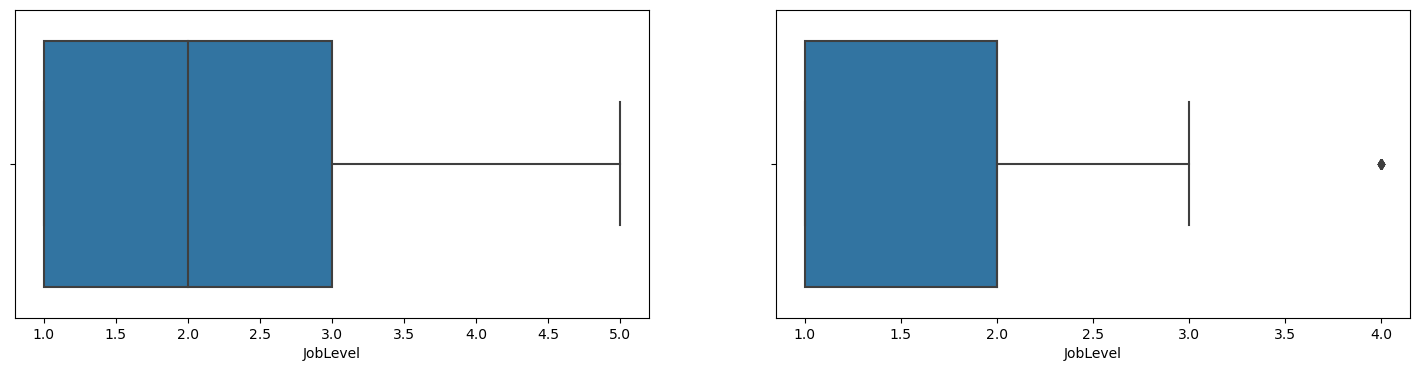

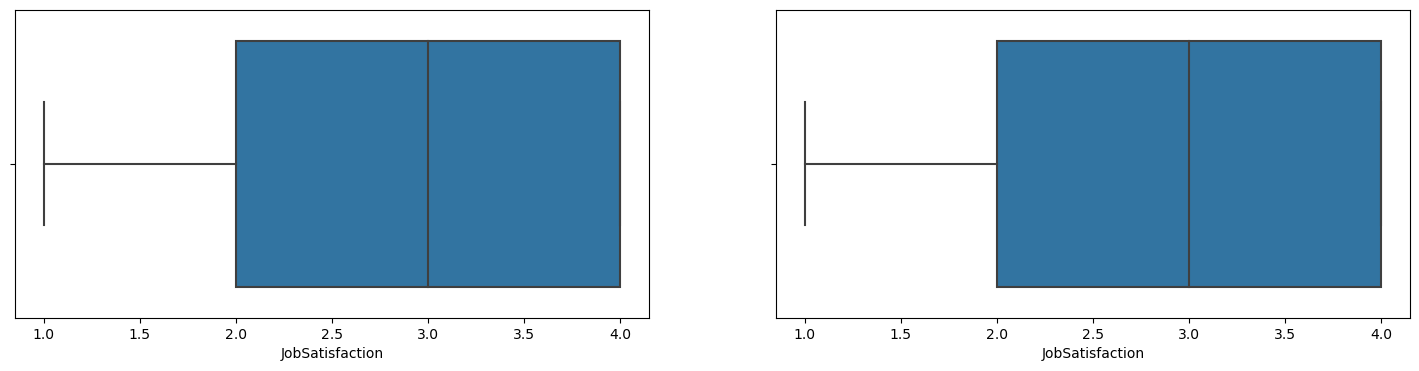

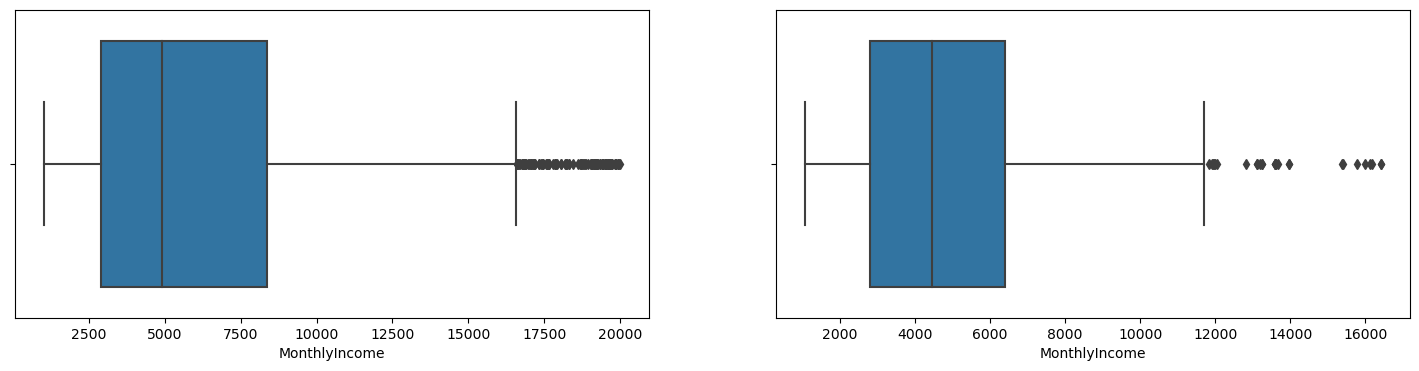

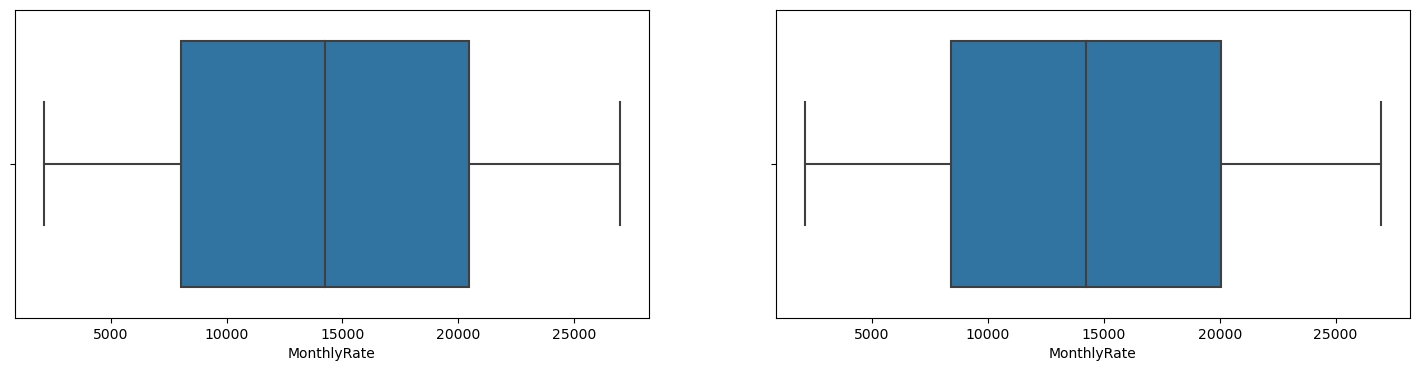

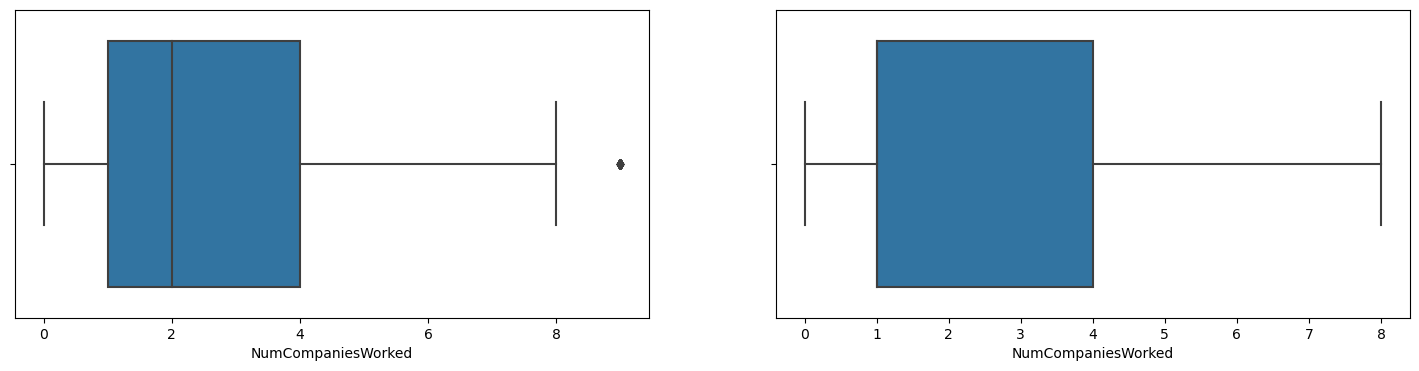

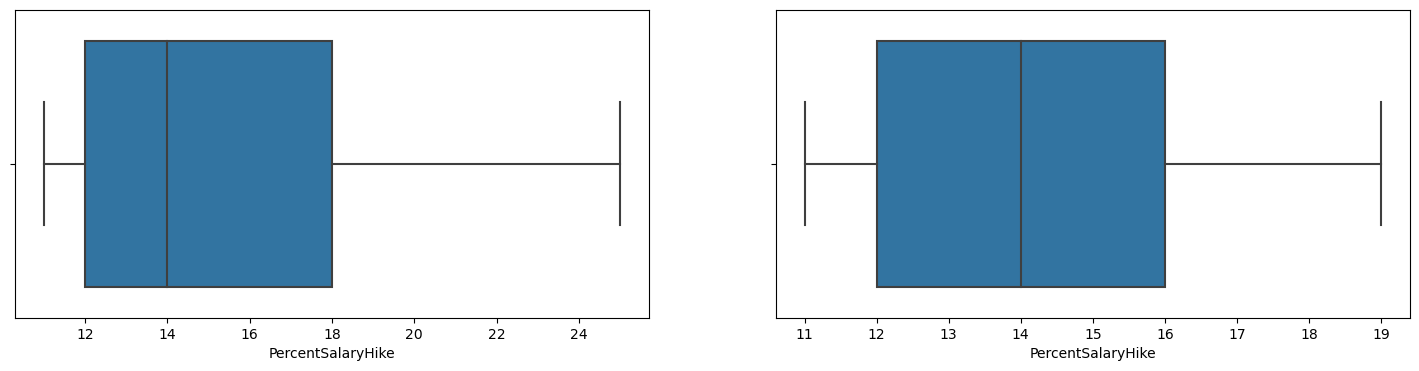

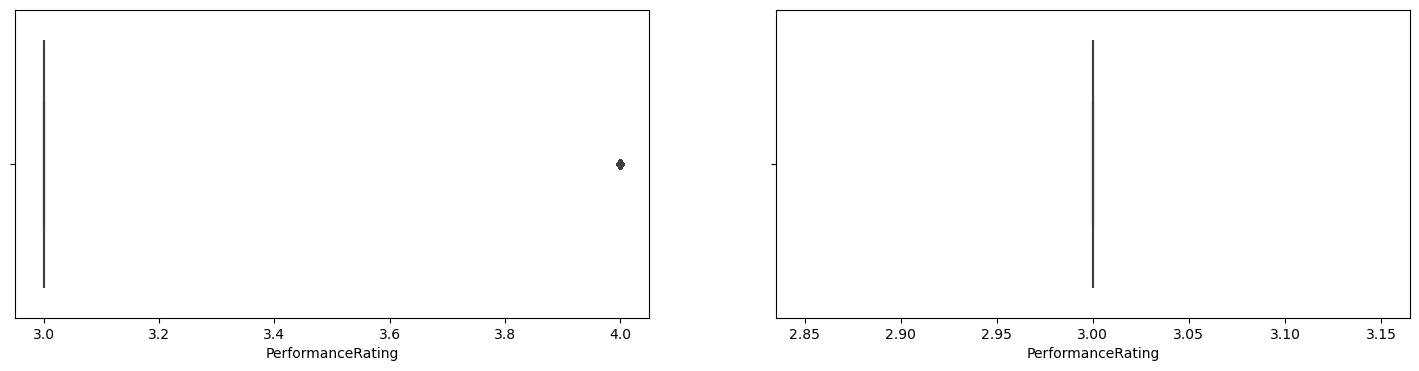

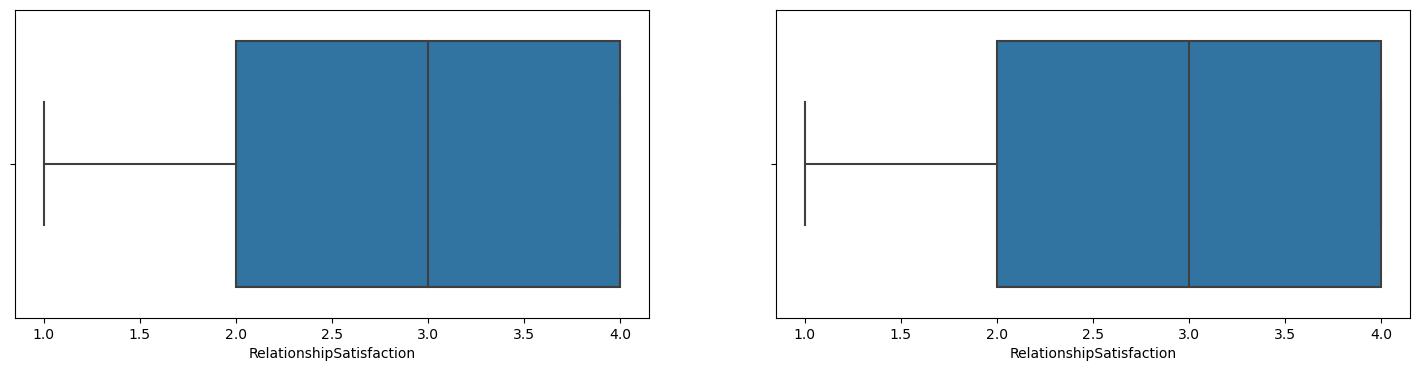

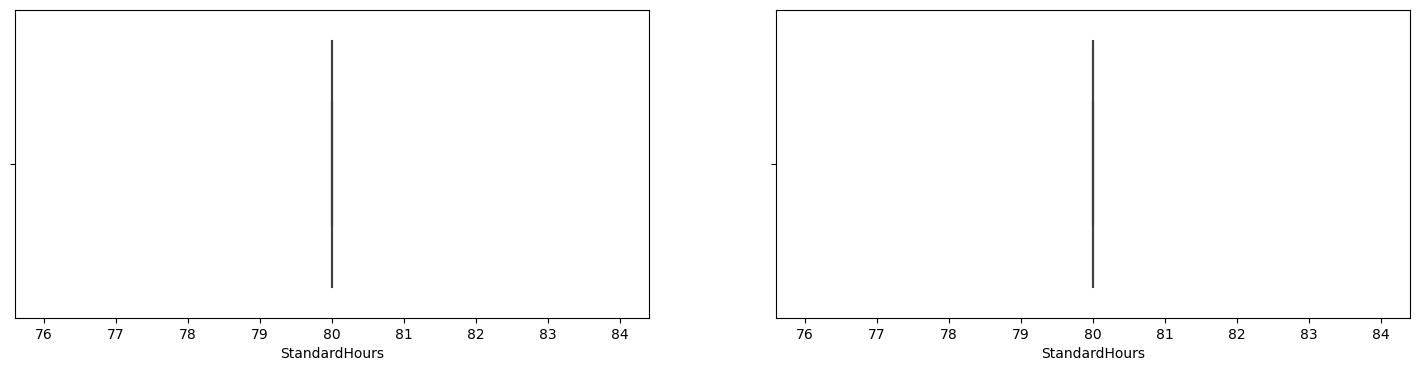

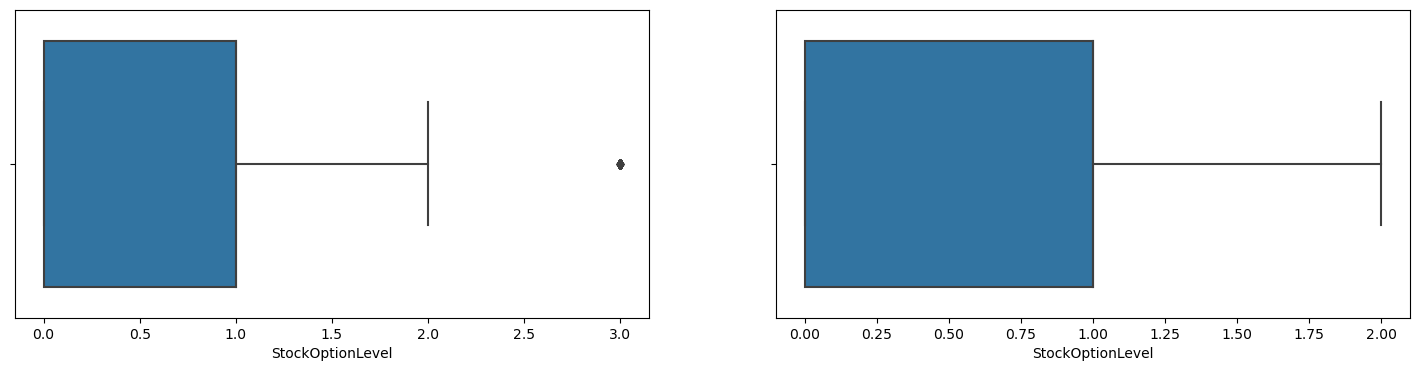

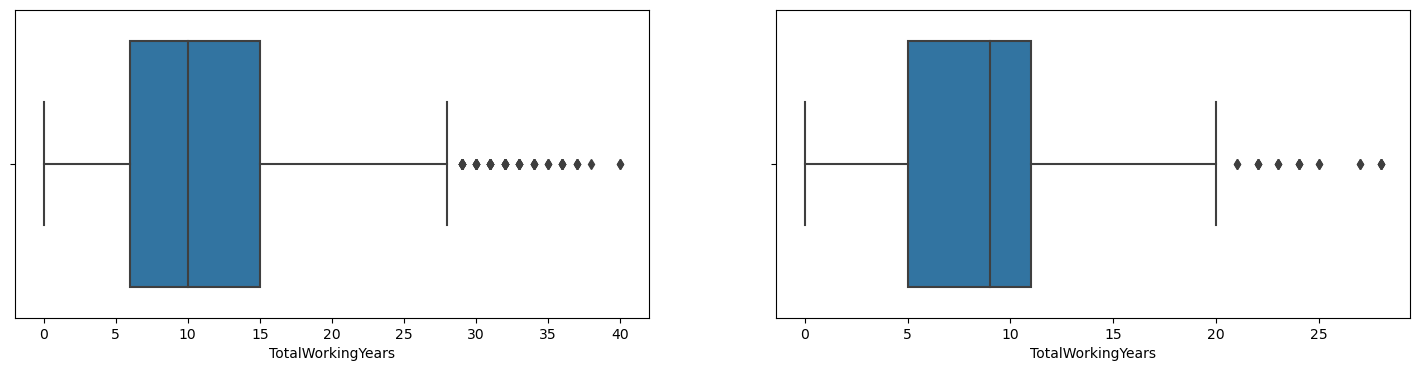

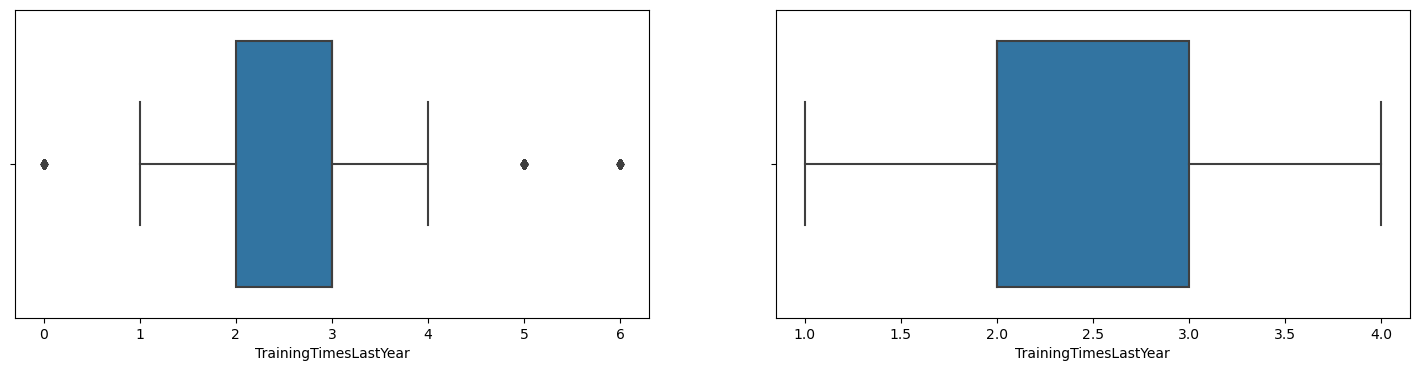

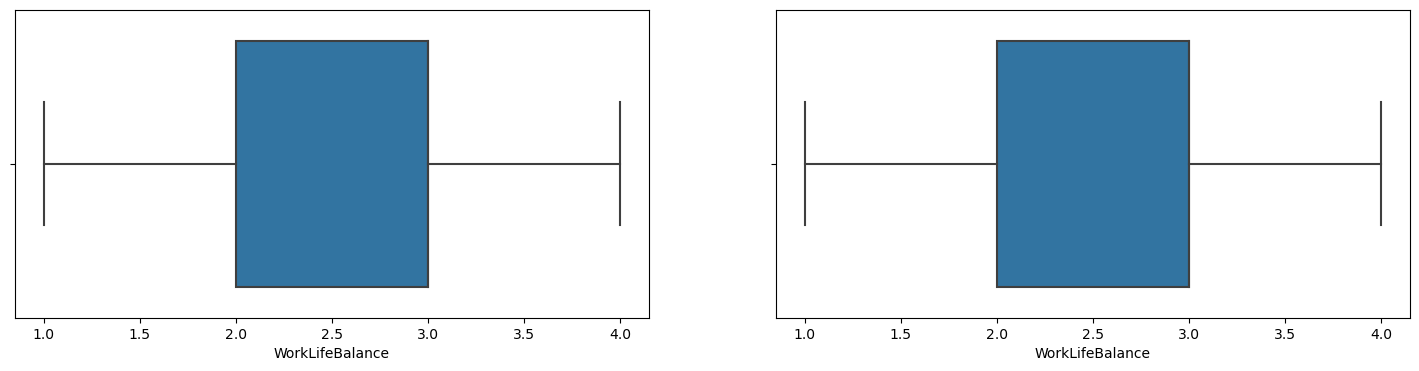

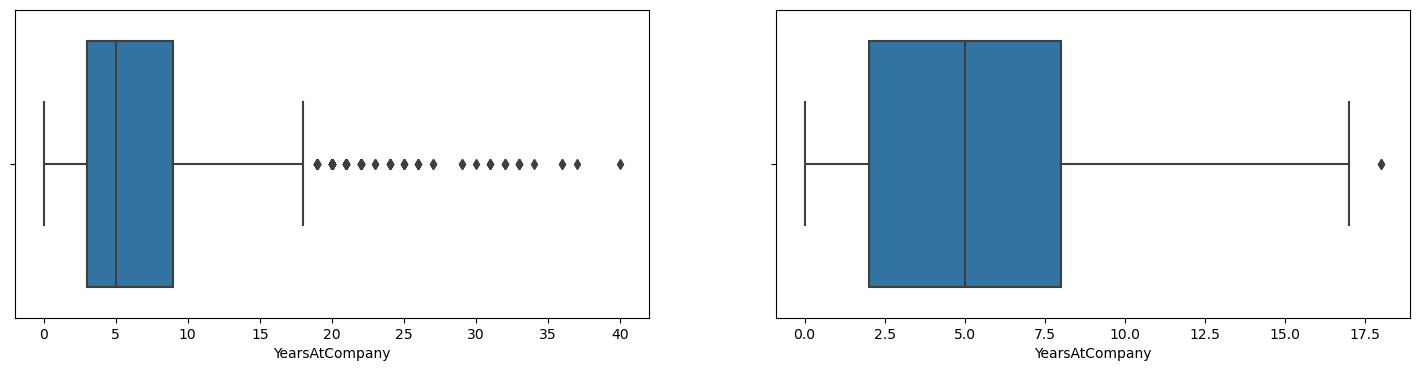

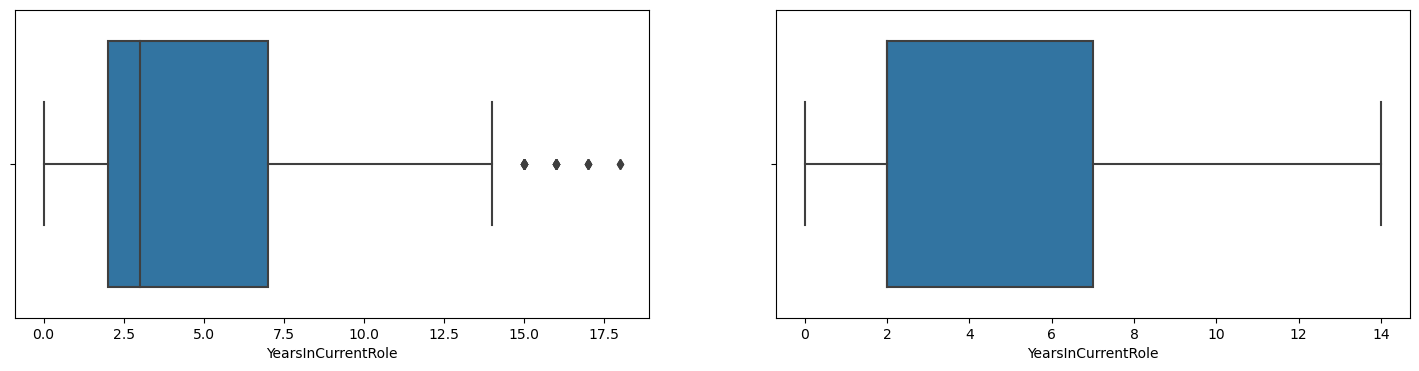

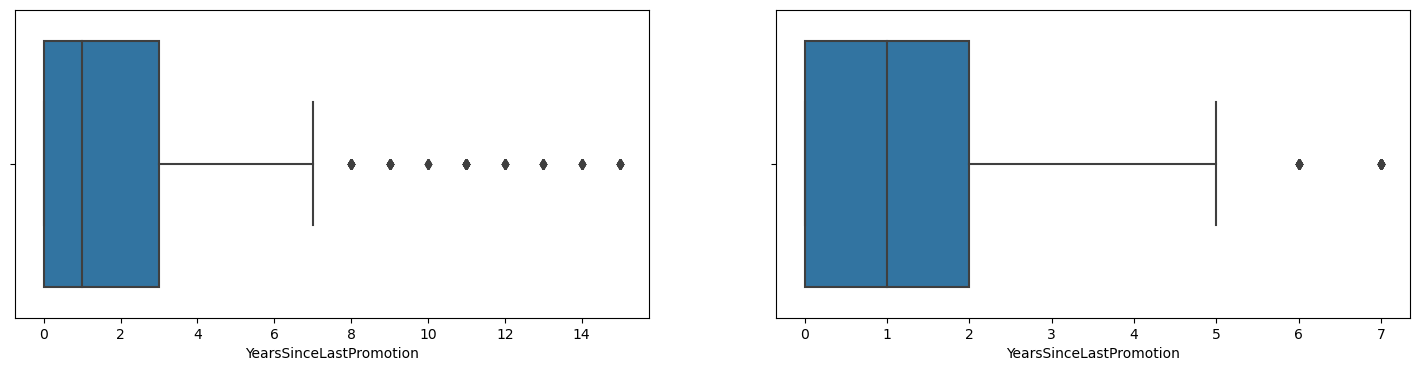

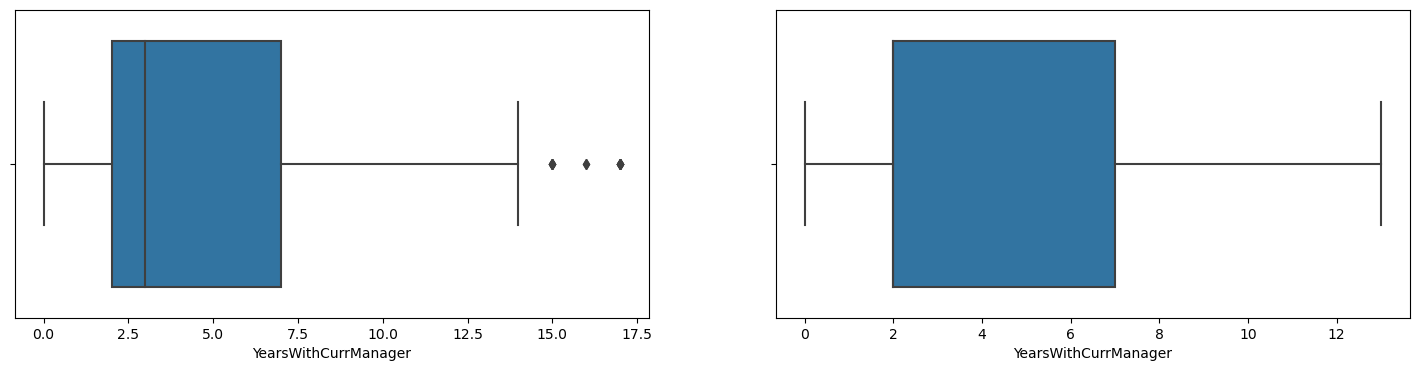

In [35]:
for col in df_num:
    fig = plt.figure(figsize=(18,4))
    
    fig.add_subplot(121)
    sns.boxplot(df_num[col])
    
    fig.add_subplot(122)
    sns.boxplot(df_clean[col])
    plt.show()

In [36]:
len(df_num),len(df_clean)

(1470, 779)

In [37]:
df_num.skew()

Age                         0.413286
DailyRate                  -0.003519
EmployeeCount               0.000000
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [38]:
np.log((df_num)+1).skew()

Age                        -0.136232
DailyRate                  -0.924265
EmployeeCount               0.000000
DistanceFromHome           -0.029121
Education                  -0.852318
EmployeeNumber             -1.804033
EnvironmentSatisfaction    -0.658951
HourlyRate                 -0.449216
JobInvolvement             -1.139708
JobLevel                    0.448133
JobSatisfaction            -0.657841
MonthlyIncome               0.286448
MonthlyRate                -0.815549
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.652509
StandardHours               0.000000
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -1.213605
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [39]:
np.sqrt((df_num)+1).skew()

Age                         0.149028
DailyRate                  -0.404375
EmployeeCount               0.000000
DistanceFromHome            0.482708
Education                  -0.572750
EmployeeNumber             -0.540287
EnvironmentSatisfaction    -0.490347
HourlyRate                 -0.233178
JobInvolvement             -0.814104
JobLevel                    0.723275
JobSatisfaction            -0.493802
MonthlyIncome               0.862053
MonthlyRate                -0.351739
NumCompaniesWorked          0.594066
PercentSalaryHike           0.665020
PerformanceRating           1.921883
RelationshipSatisfaction   -0.477283
StandardHours               0.000000
StockOptionLevel            0.581350
TotalWorkingYears           0.361370
TrainingTimesLastYear      -0.146852
WorkLifeBalance            -0.878571
YearsAtCompany              0.753898
YearsInCurrentRole          0.263826
YearsSinceLastPromotion     1.313190
YearsWithCurrManager        0.235520
dtype: float64

In [40]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [41]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_new=scale.fit_transform(X)
x_new

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.53487311,
         1.08823234, -0.68556546]])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=340)

In [43]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1102, 53), (1102,), (368, 53), (368,))

In [44]:
# importing the training dependencies:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# importing the evaluation metrics despendencies
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,auc,confusion_matrix,classification_report,plot_confusion_matrix

In [47]:
# training the model:
# helper function
def train_n_ret_scores(model):
    """
    Input: model for fitting the data.
    Output: scores on the test set
    """
    model.fit(x_train,y_train)
    
    y_preds = model.predict(x_test)
    
    print(classification_report(y_test,y_preds))
    

In [48]:
# try1: Decision Tree

train_n_ret_scores(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       305
           1       0.35      0.30      0.32        63

    accuracy                           0.78       368
   macro avg       0.60      0.59      0.60       368
weighted avg       0.77      0.78      0.78       368



In [49]:
# try2: Random Forest

train_n_ret_scores(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       305
           1       0.22      0.03      0.06        63

    accuracy                           0.82       368
   macro avg       0.53      0.50      0.48       368
weighted avg       0.73      0.82      0.75       368



In [50]:
# try3: Gradient Boost

train_n_ret_scores(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       305
           1       0.58      0.17      0.27        63

    accuracy                           0.84       368
   macro avg       0.71      0.57      0.59       368
weighted avg       0.80      0.84      0.80       368



In [51]:
 #try4: AdaAdaBoostClassifier

train_n_ret_scores(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       305
           1       0.67      0.32      0.43        63

    accuracy                           0.86       368
   macro avg       0.77      0.64      0.67       368
weighted avg       0.84      0.86      0.83       368



In [52]:
# Let's do an Adaboost with base Gradient Boost
# try5: AdaAdaBoostClassifier with base as Gradient Boost

train_n_ret_scores(AdaBoostClassifier(RandomForestClassifier()))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       305
           1       0.40      0.06      0.11        63

    accuracy                           0.82       368
   macro avg       0.62      0.52      0.51       368
weighted avg       0.76      0.82      0.77       368



In [53]:
# try6: SVR

train_n_ret_scores(SVC())

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       305
           1       0.89      0.13      0.22        63

    accuracy                           0.85       368
   macro avg       0.87      0.56      0.57       368
weighted avg       0.85      0.85      0.80       368



In [54]:
# try7: Gaussian NB

train_n_ret_scores(GaussianNB())

              precision    recall  f1-score   support

           0       0.92      0.63      0.75       305
           1       0.29      0.75      0.42        63

    accuracy                           0.65       368
   macro avg       0.61      0.69      0.58       368
weighted avg       0.81      0.65      0.69       368



In [55]:
# try8: KNN

train_n_ret_scores(KNeighborsClassifier(n_neighbors=5))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       305
           1       0.64      0.11      0.19        63

    accuracy                           0.84       368
   macro avg       0.74      0.55      0.55       368
weighted avg       0.81      0.84      0.79       368



In [56]:
# try9 : Logistic

train_n_ret_scores(LogisticRegression())

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       305
           1       0.74      0.44      0.55        63

    accuracy                           0.88       368
   macro avg       0.82      0.71      0.74       368
weighted avg       0.87      0.88      0.86       368



In [57]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Precision','Recall','F1_score','Avg_CV'])

for model,model_names in zip(models,model_names):
    
    model.fit(x_train,y_train)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    y_preds = model.predict(x_test)
    
    prec = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1= f1_score(y_test,y_preds)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42)))

    models_df = models_df.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Precision':prec,'Recall':recall,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)
    
models_df.set_index('Model',inplace=True)

models_df

,Train_Acc,Test_Acc,Precision,Recall,F1_score,Avg_CV
Model,,,,,,
LogisticRegression,0.891107,0.877717,0.736842,0.444444,0.554455,0.838776
DecisionTreeClassifier,1.000000,0.779891,0.333333,0.285714,0.307692,0.775510
RandomForestClassifier,1.000000,0.820652,0.333333,0.047619,0.083333,0.853061
GradientBoostingClassifier,0.960073,0.836957,0.578947,0.174603,0.268293,0.870748
AdaBoostClassifier,0.916515,0.855978,0.666667,0.317460,0.430108,0.867347
KNeighborsClassifier,0.875681,0.836957,0.636364,0.111111,0.189189,0.815646
SVC,0.911071,0.847826,0.888889,0.126984,0.222222,0.838776
GaussianNB,0.668784,0.646739,0.291925,0.746032,0.419643,0.742857


In [58]:
 models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Precision','Recall','F1_score','Avg_CV'])

for model,model_names in zip(models,model_names):
    
    model.fit(x_train,y_train)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    y_preds = model.predict(x_test)
    
    prec = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1= f1_score(y_test,y_preds)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42)))

    models_df = models_df.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Precision':prec,'Recall':recall,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)
    
models_df.set_index('Model',inplace=True)

In [59]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(LogisticRegression()),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df_new = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Avg_CV','Avg_CV_ROC_AUC'])

for model,model_names in zip(models,model_names):
    #print(model,model_names)
    model.fit(x_train,y_train)
    
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    y_preds = model.predict(x_test)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42),scoring='accuracy'))
    
    avg_cv_roc_auc = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42),scoring='roc_auc'))
    #print(train_acc,test_acc,avg_cv,avg_cv_roc_auc)
    models_df_new = models_df_new.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Avg_CV':avg_cv,'Avg_CV_ROC_AUC':avg_cv_roc_auc},ignore_index=True)
    #print(models_df_new)
#models_df_new.set_index('Model',inplace=True)

models_df_new

,Model,Train_Acc,Test_Acc,Avg_CV,Avg_CV_ROC_AUC
0,LogisticRegression,0.891107,0.877717,0.838776,0.676966
1,DecisionTreeClassifier,1.000000,0.774457,0.773469,0.590857
2,RandomForestClassifier,1.000000,0.817935,0.858503,0.812549
3,GradientBoostingClassifier,0.960073,0.836957,0.870068,0.826560
4,AdaBoostClassifier,0.882033,0.869565,0.855102,0.798440
5,KNeighborsClassifier,0.875681,0.836957,0.815646,0.591976
6,SVC,0.911071,0.847826,0.838776,0.549070
7,GaussianNB,0.668784,0.646739,0.742857,0.768437


In [61]:
np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True),scoring='roc_auc'))

0.76848543305186

In [63]:
# Saving the bes model:
import joblib

joblib.dump(model,'HR.pkl')

['HR.pkl']